Name: Ahmet Boran Özüm
Student Id: 2380814

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.signal
import time

In [5]:
# Image imports

chessboard = cv2.imread('chessboard.png')
agac = cv2.imread('agac.png')
chessboard_rotated = cv2.imread('chessboardrotated.png')
agac_rotated = cv2.imread('agacrotated.png')
lab_rotated = cv2.imread('labrotated.png')
lab = cv2.imread('lab.png')

### Task 1: Naive Formula + Uniform Weighting

In [37]:
def naive_uniform(original_img):
    # Take the copy of the image
    img_copy = original_img.copy()
    
    # Turn the copy into grayscale image
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    # This will be the 2D E(u,v) numpy vector representing each pixel
    res = np.zeros(img_gray.shape)

    # Starting from [2][2] all the way to [-2][-2] form 3x3 windows around the pixel
    for y in range(2,len(img_gray)-2):
        for x in range(2,len(img_gray[0])-2):
            
            total_sum = 0
            original_window = img_gray[y-1:y+2, x-1:x+2]
            
            # For each 8 direction
            for u in range(-1,2):
                for v in range(-1,2):
                    if u==0 and v==0:
                        continue
                    
                    # Create a window that is shifted by u,v 
                    shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                    
                    # Take the squared differences and sum them
                    diff = original_window-shifted_window
                    diff_squared = np.square(diff)
                    total_sum += np.sum(diff_squared)
            
            res[y][x] = total_sum
            
    # Code segment for taking the top 10 scores and paint a circle on the pixel that is selected to be a corner
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 1.530379
Time elapsed for rotated chessboard 1.523024
Time elapsed for agac 1.518393
Time elapsed for rotated agac 1.898036
Time elapsed for lab 1.495389
Time elapsed for rotated lab 1.516871


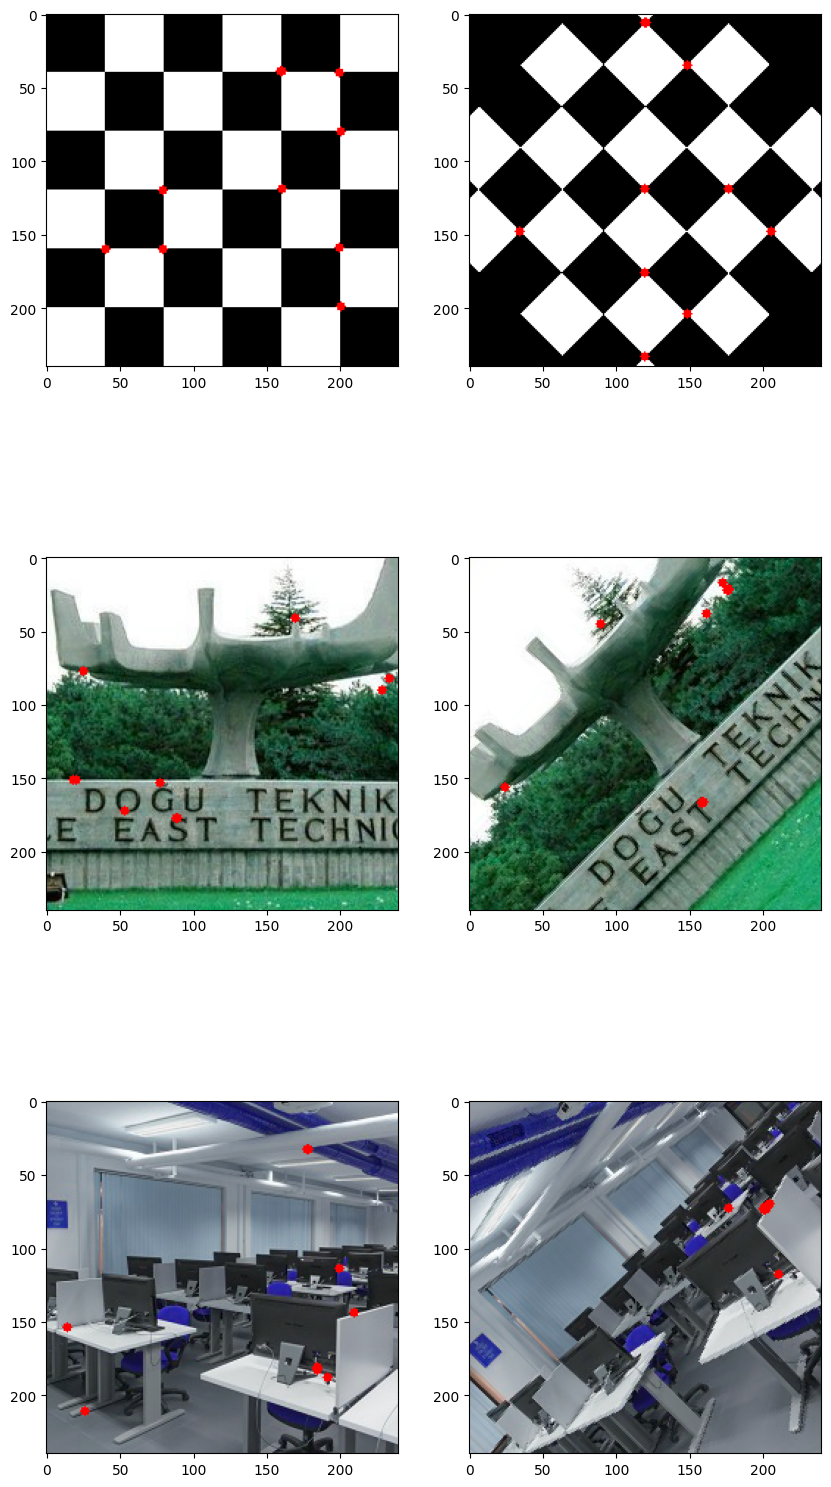

In [38]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))


fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))


fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [36]:
## This part is for discussion

"""
    In this task, we performed the naive formula, without applying non-maximum suppression. This method not only takes long
    amount of time, without applying the non-maximum suppression, the algorithm can find maximum results for adjacent neighours,
    which results in finding corners at the same location. Note that this method produces rotation-variant results, it does not 
    find maximum results in the rotated version of the image, as it finds in the original one.
"""

### Task2: Naive Formula + Uniform Weighting + Non-Maximum Suppression

In [14]:
## Write your code here

def naive_uniform_nonmax(original_img):
    
    # Below is same with naive_uniform
    
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
    
    for y in range(2,len(img_gray)-2):
            for x in range(2,len(img_gray[0])-2):

                total_sum = 0
                original_window = img_gray[y-1:y+2, x-1:x+2]
                for u in range(-1,2):
                    for v in range(-1,2):
                        if u==0 and v==0:
                            continue
                        shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                        diff = original_window-shifted_window
                        diff_squared = np.square(diff)
                        total_sum += np.sum(diff_squared)

                res[y][x] = total_sum
   
    
    # In a 10x10 local window, apply non-maximum suppresion
    
    for y in range(5,len(res)-5):
        for x in range(5,len(res[0])-5):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-5,6):
                for v in range(-5,6):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max                    
    
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy


Time elapsed for chessboard 3.691103
Time elapsed for rotated chessboard 3.725105
Time elapsed for agac 3.679760
Time elapsed for rotated agac 3.591115
Time elapsed for lab 3.606023
Time elapsed for rotated lab 3.574386


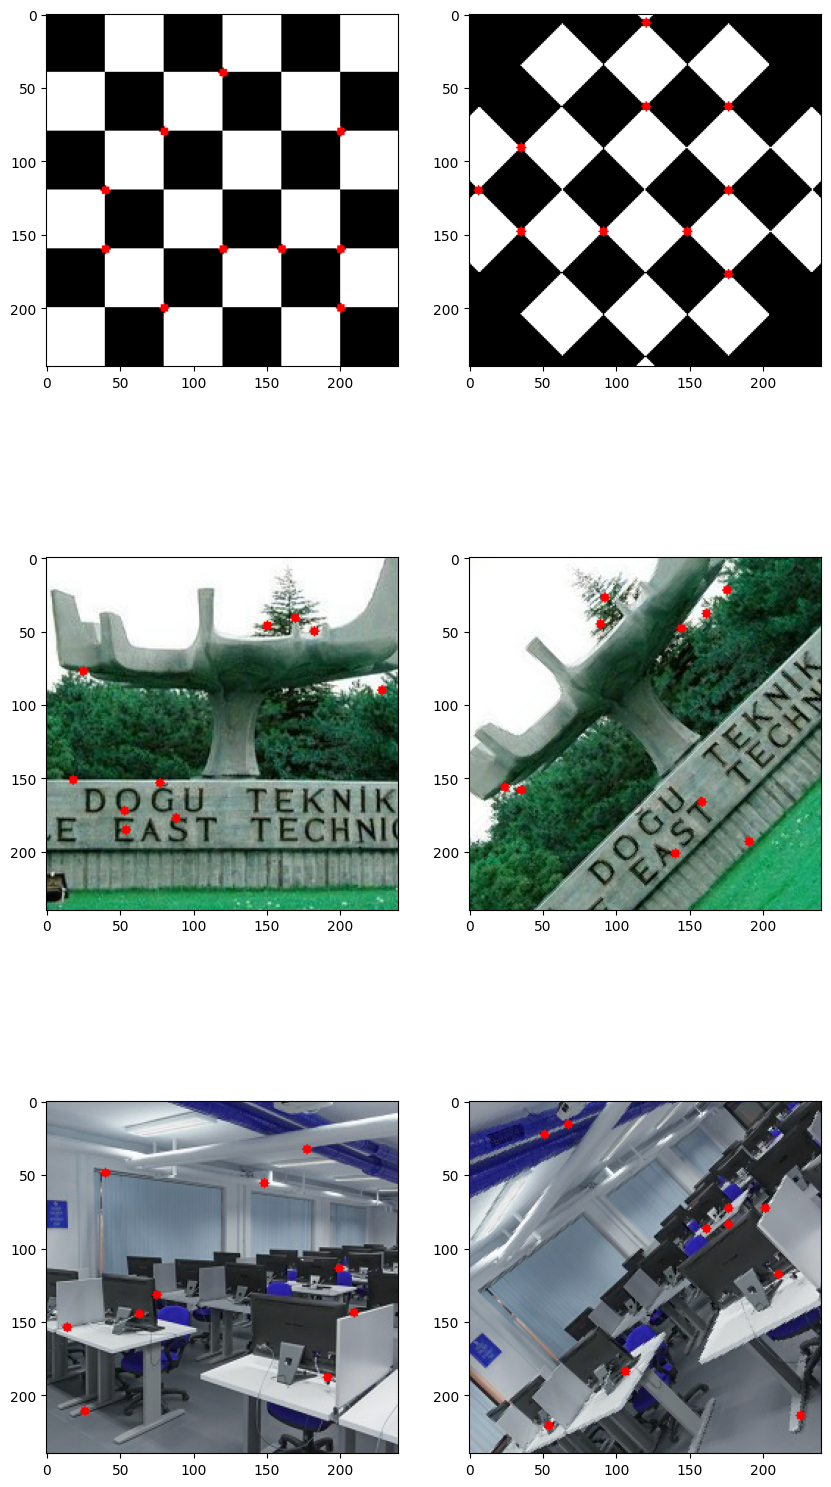

In [15]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))


fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))


fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion

"""
    In this task, we performed the naive formula but also applied non-maximum suppression. This method not only takes long
    amount of time, without applying the non-maximum suppression, the algorithm can find maximum results for adjacent neighours,
    which results in finding corners at the same location. Note that this method produces rotation-variant results, it does not 
    find maximum results in the rotated version of the image, as it finds in the original one.
"""

### Task3: Taylor's Approximation + Uniform Weighting + Non-Maximum Suppression

In [43]:
## Write your code here

sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = sobel_x.T

def taylor_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    # Apply sobel operators to find gradients of the pixels along x and y direction
    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    

    # Find Ix**2, Iy**2 and IxIy
    I_x_I_y = I_x*I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)
    
    res = np.zeros(img_gray.shape)
    for y in range(2,len(res)-2):
        for x in range(2,len(res[0])-2):
            total_sum = 0
            
            # Find the corresponding gradient values inside the window
            ix = I_x_squared[y-2:y+3, x-2:x+3]
            iy = I_y_squared[y-2:y+3, x-2:x+3]
            ixiy = I_x_I_y[y-2:y+3, x-2:x+3]
            
            H = np.array([[np.sum(ix), np.sum(ixiy)], [np.sum(ixiy), np.sum(iy)]])
                
            for u in range(-1,2):
                for v in range(-1,2):
                    if u == 0 and v == 0:
                        continue

                    mul = np.matmul(np.array([u,v]), H)
                    mul = np.matmul(mul, np.array([[u],[v]]))
                    total_sum += mul[0]                    
                    
            res[y][x] = total_sum
            
    # Non-maximum suppresion        
    for y in range(5,len(res)-5):
        for x in range(5,len(res[0])-5):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-5,6):
                for v in range(-5,6):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max 
            
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 8.680305
Time elapsed for rotated chessboard 8.887357
Time elapsed for agac 8.585804
Time elapsed for rotated agac 8.302602
Time elapsed for lab 8.605580
Time elapsed for rotated lab 8.658743


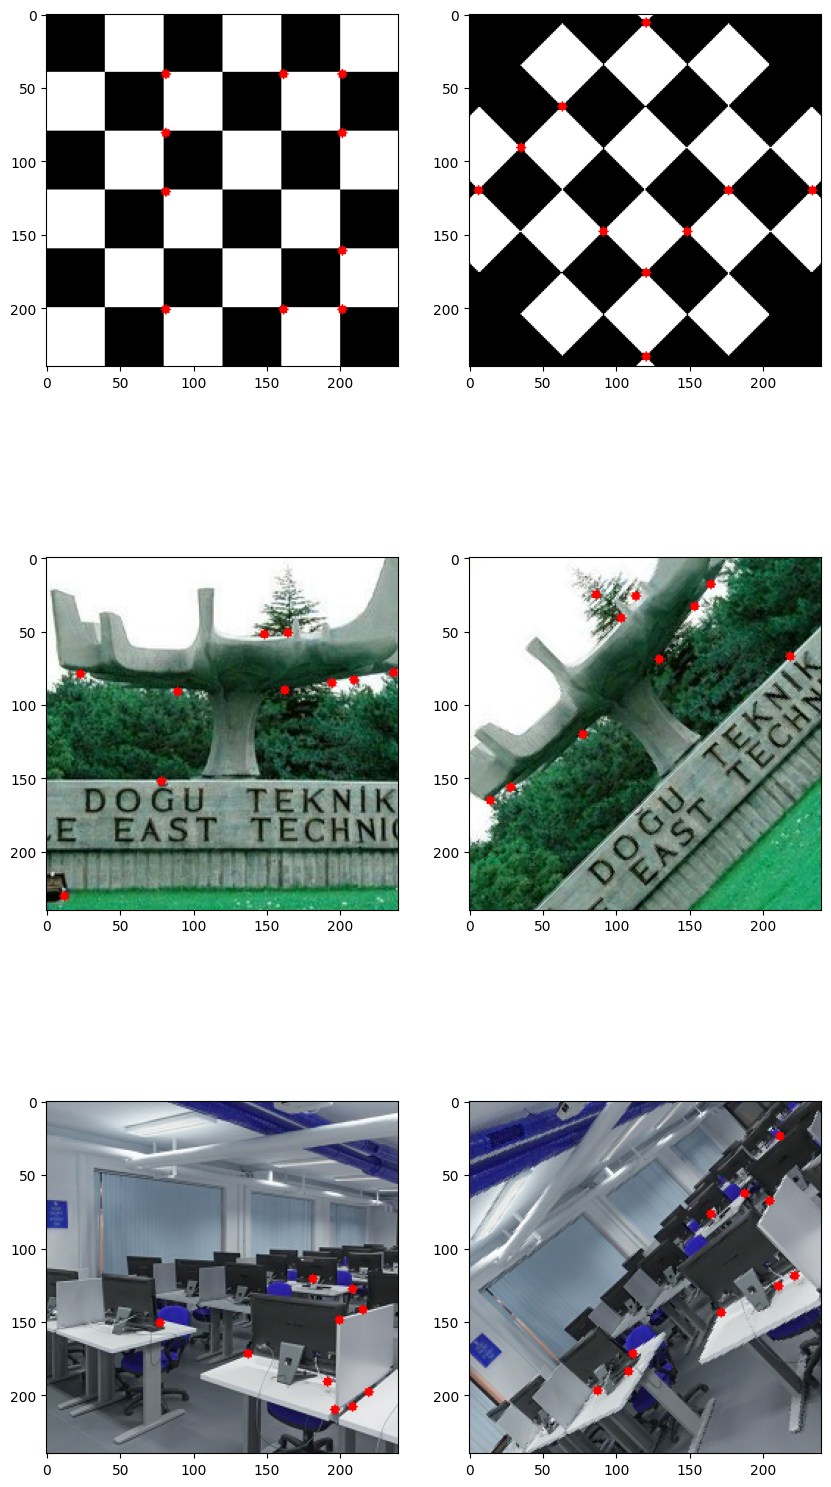

In [44]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(taylor_uniform_nonmax(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(taylor_uniform_nonmax(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(taylor_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(taylor_uniform_nonmax(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(taylor_uniform_nonmax(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(taylor_uniform_nonmax(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion

"""
    The formula that we implemented in task 1, needs to be maximized in order to find more reliable corners in the image. In 
    addition to that, we need to speed up the process of iterating nxn window along the image. Here in this task, we make a
    approximation by using taylor series expansion. Since we convolve the grayscale images with sobel operators, the process
    seems takes a long time but the performance of the detector is increased, especially in the lab image. Note that we still
    do not produce rotation-invariant results because of the change in the localization of the pixels.
"""

### Task 4: Smaller Eigenvalue as corner score + Uniform Weighting + Non-Maximum Suppression

In [28]:
def smaller_eigenvalues(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    I_x_I_y = I_x * I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)

    res = np.zeros(img_gray.shape)
    for y in range(1, len(res) - 1):
        for x in range(1, len(res[0]) - 1):
            total_sum = 0
            ix = I_x_squared[y - 1:y + 2, x - 1:x + 2]
            iy = I_y_squared[y - 1:y + 2, x - 2:x + 2]
            ixiy = I_x_I_y[y - 2:y + 2, x - 1:x + 2]

            # Sum the gradients (below slide 31)
            sum_ix = np.sum(ix)
            sum_iy = np.sum(iy)
            sum_ixiy = np.sum(ixiy)

            # Find the eigenvalues of H
            H = np.array([[sum_ix, sum_ixiy], [sum_ixiy, sum_iy]])
            eigenvalues = np.linalg.eigvals(H)

            # Consider the small one and apply threshold
            if eigenvalues[0] < eigenvalues[1]:
                if eigenvalues[0] > 2:
                    res[y][x] = eigenvalues[0]
            else:
                if eigenvalues[1] > 2:
                    res[y][x] = eigenvalues[1]
            
    # Non-maximum suppression
    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)

    return img_copy

Time elapsed for chessboard 6.214259
Time elapsed for rotated chessboard 6.284834
Time elapsed for agac 6.078744
Time elapsed for rotated agac 6.084525
Time elapsed for lab 6.054186
Time elapsed for rotated lab 6.101826


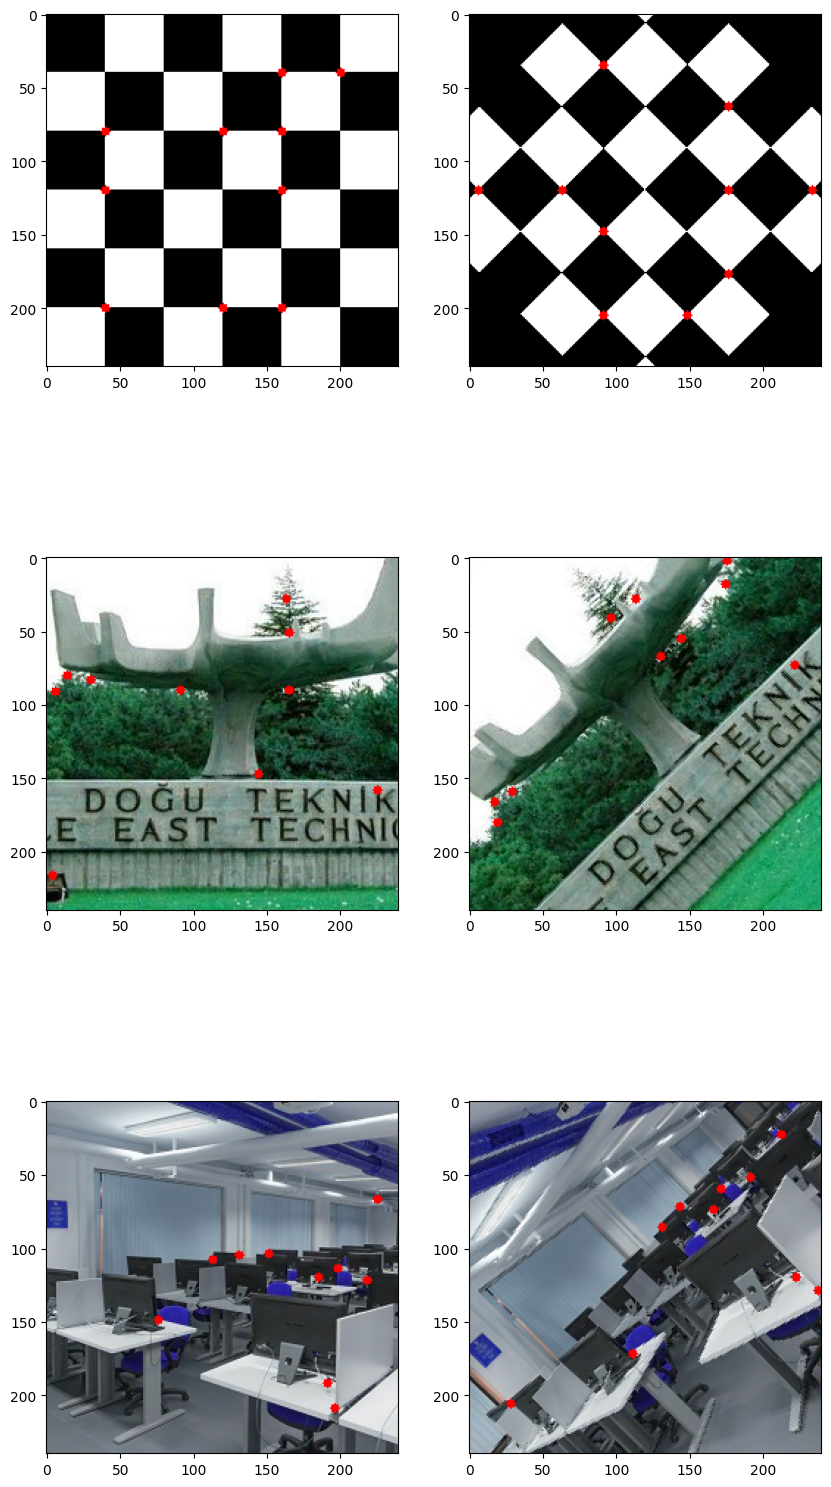

In [55]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(smaller_eigenvalues(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(smaller_eigenvalues(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(smaller_eigenvalues(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(smaller_eigenvalues(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(smaller_eigenvalues(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(smaller_eigenvalues(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [54]:
## This part is for discussion

"""
    In this task, instead of iterating a window and find E values along 8 directions, we simply calculate the H matrix of a
    specific window. Since we want to maximize the results, we should consider minimum E values. If these values are high, it
    will indicate that the probability of that pixel being a corner point is high. The methods effectiveness can be observed
    above. The corner point are more accurately identified. Also it takes relatively less amount of time than the method we
    implemented in task 4.
"""

### Task 5: R function as corner score + Uniform Weighting + Non-Maximum Suppression

In [56]:
## Write your code here
def rFunction(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    I_x_I_y = I_x * I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)

    res = np.zeros(img_gray.shape)

    for y in range(1, len(res) - 1):
        for x in range(1, len(res[0]) - 1):
            total_sum = 0
            ix = I_x_squared[y - 1:y + 2, x - 1:x + 2]
            iy = I_y_squared[y - 1:y + 2, x - 1:x + 2]
            ixiy = I_x_I_y[y - 1:y + 2, x - 1:x + 2]

            sum_ix = np.sum(ix)
            sum_iy = np.sum(iy)
            sum_ixiy = np.sum(ixiy)

            # Calculate the R function (det - k*trace**2)
            H = np.array([[sum_ix, sum_ixiy], [sum_ixiy, sum_iy]])
            det = np.linalg.det(H)
            trace = np.trace(H)
            
            # k is defined as 0.04
            res[y][x] = det - 0.04 * np.square(trace)
       
    # Non-maximum suppression
    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)

    return img_copy

Time elapsed for chessboard 5.857025
Time elapsed for rotated chessboard 6.015327
Time elapsed for agac 5.757852
Time elapsed for rotated agac 5.706884
Time elapsed for lab 5.736365
Time elapsed for rotated lab 5.671561


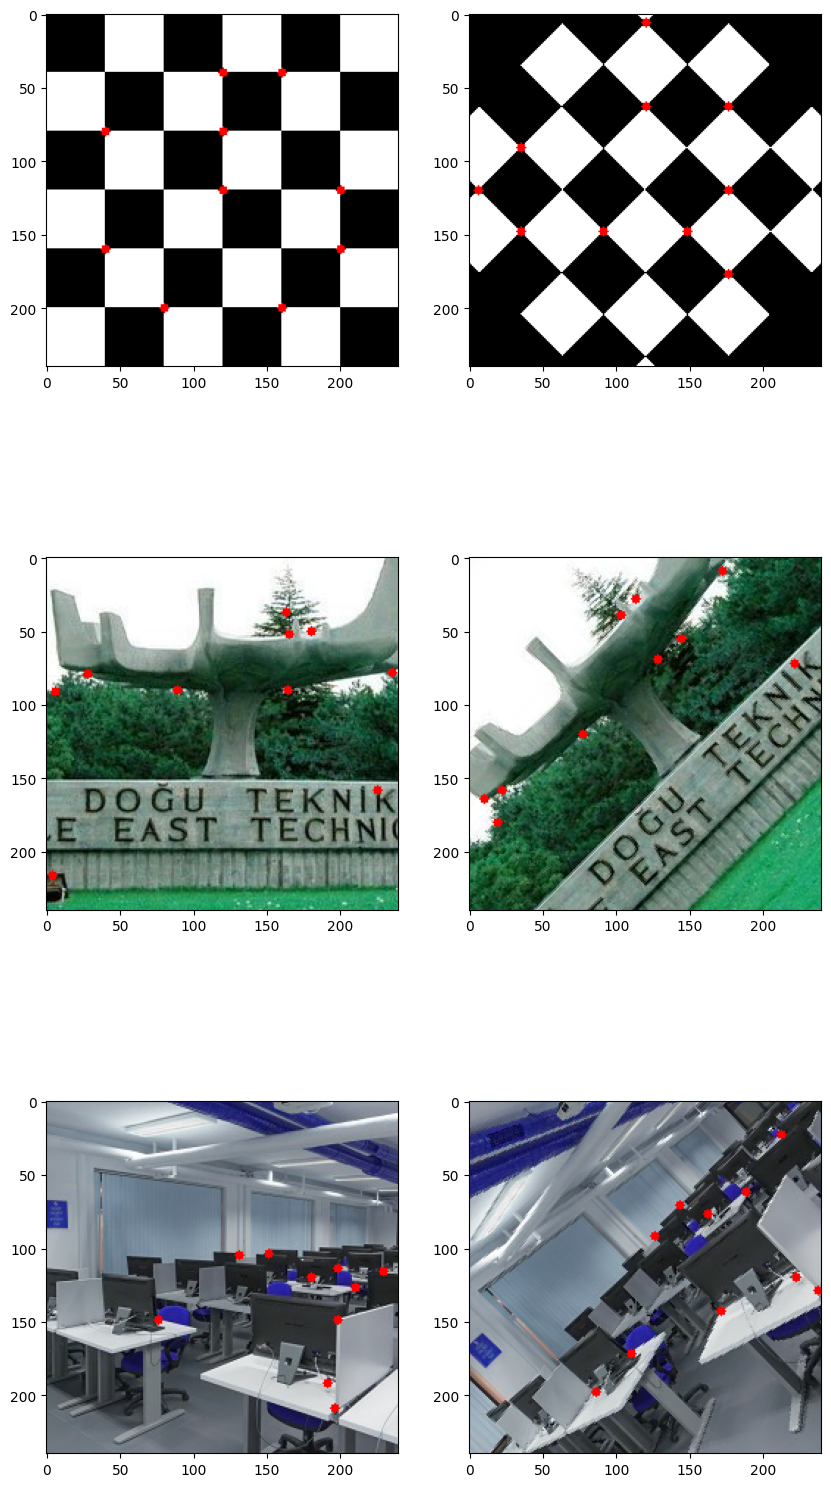

In [58]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(rFunction(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(rFunction(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(rFunction(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(rFunction(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(rFunction(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(rFunction(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [ ]:
## This part is for discussion

"""
    In this task, we improved our corner detector by defining certain conditions. In this case, the return value of R function
    and its sign indicates more certain results. (positive->corner, negative->edge, small->flat region). Also it executes faster
    since we omit costly operations such as taking square root.
"""

### Task 6: R function with fast windowing based on fitering + Uniform Weighting + Non-Maximum Suppression

In [31]:
def option1(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    I_x_square = np.square(I_x)
    I_y_square = np.square(I_y)
    I_xy = I_x * I_y

    # Convolve with 3x3 uniform window
    convolvedI_x_square = scipy.signal.convolve2d(I_x_square, np.ones((3, 3)), mode='same', boundary='symm')
    convolvedI_y_square = scipy.signal.convolve2d(I_y_square, np.ones((3, 3)), mode='same', boundary='symm')
    convolvedI_xy = scipy.signal.convolve2d(I_xy, np.ones((3, 3)), mode='same', boundary='symm')

    det_matrix = convolvedI_x_square * convolvedI_y_square - convolvedI_xy * convolvedI_xy
    trace_matrix = convolvedI_x_square + convolvedI_y_square
    
    res = det_matrix - 0.04 * np.square(trace_matrix)

    # Non-maximum suppression
    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 2.192361
Time elapsed for rotated chessboard 2.277611
Time elapsed for agac 2.068882
Time elapsed for rotated agac 2.049902
Time elapsed for lab 2.098638
Time elapsed for rotated lab 2.026909


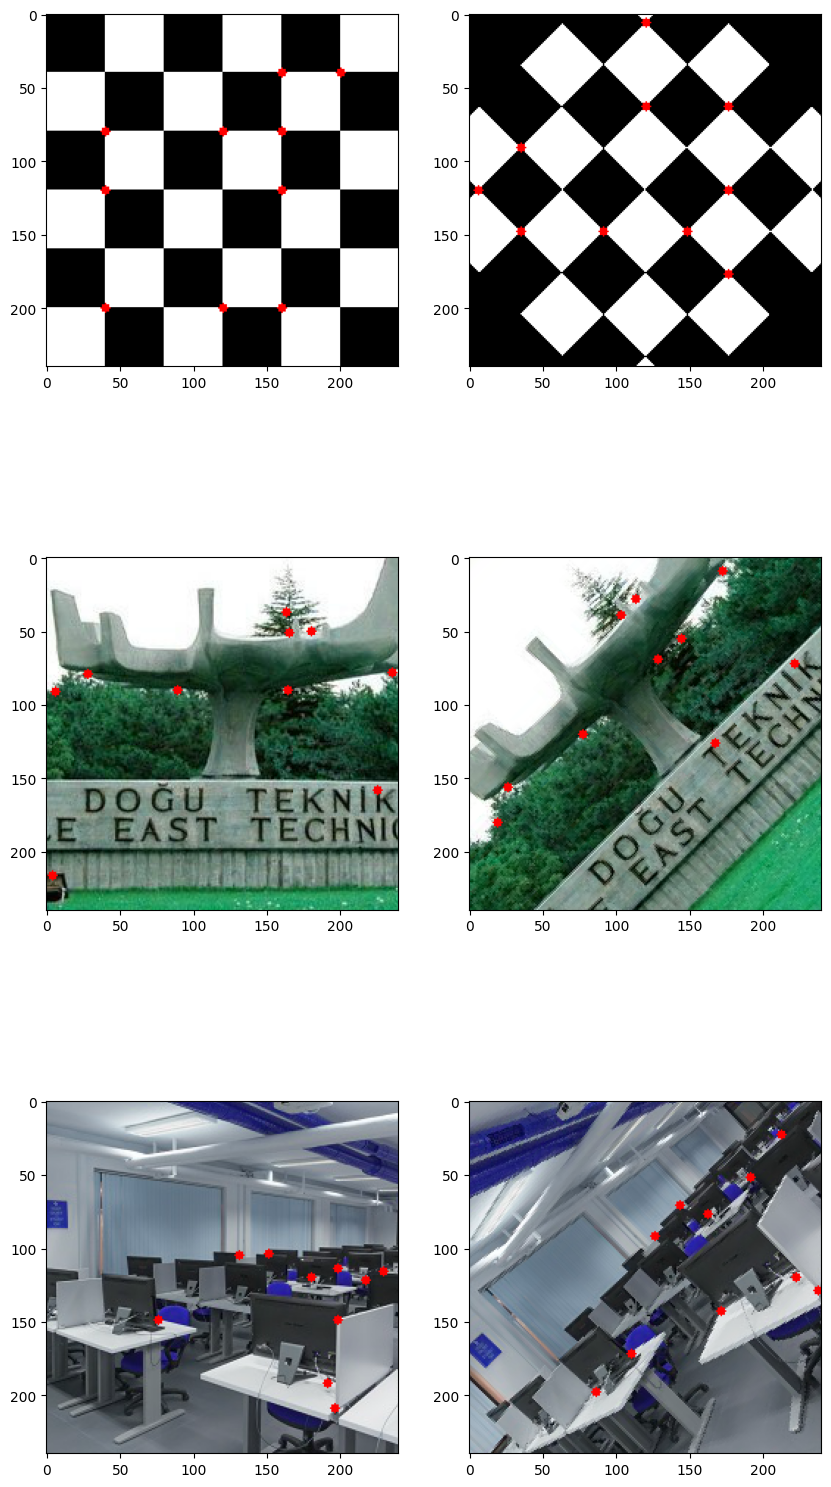

In [32]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(option1(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(option1(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(option1(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(option1(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(option1(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(option1(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [77]:
## This part is for discussion

"""
    The R function (Harris operator) can be further accelerated. In this task, instead of iterating a window along the image,
    we simply convolute with a uniform kernel that acts like a window. The convolution operation operates faster than a for loop
    and the performance does not change in case of corner accuracy.
"""

### Task 7: R function with fast windowing based on fitering + Gaussian Weighting + Non-Maximum Suppression

In [33]:
## Write your code here
def gaussianKernel(size, sigma=1):
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

def option2(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    I_x_square = np.square(I_x)
    I_y_square = np.square(I_y)
    I_xy = I_x * I_y
    
    # Compute the gaussian kernel with size 3x3 and sigma=1
    gaussian_kernel = gaussianKernel(3, 1)
    
    # Convolve with the gaussian kernel
    gaussian_I_x_squared = scipy.signal.convolve2d(I_x_square, gaussian_kernel, mode='same', boundary='symm')
    gaussian_I_y_squared = scipy.signal.convolve2d(I_y_square, gaussian_kernel, mode='same', boundary='symm')
    gaussian_I_xy = scipy.signal.convolve2d(I_xy, gaussian_kernel, mode='same', boundary='symm')
    
    det_matrix = (gaussian_I_x_squared * gaussian_I_y_squared) - (gaussian_I_xy**2)
    trace_matrix = gaussian_I_x_squared + gaussian_I_y_squared
    
    res = det_matrix - 0.04*np.square(trace_matrix)

    # Non-maximum suppression
    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 2.203399
Time elapsed for rotated chessboard 2.257879
Time elapsed for agac 2.034940
Time elapsed for rotated agac 2.021070
Time elapsed for lab 2.030363
Time elapsed for rotated lab 2.027409


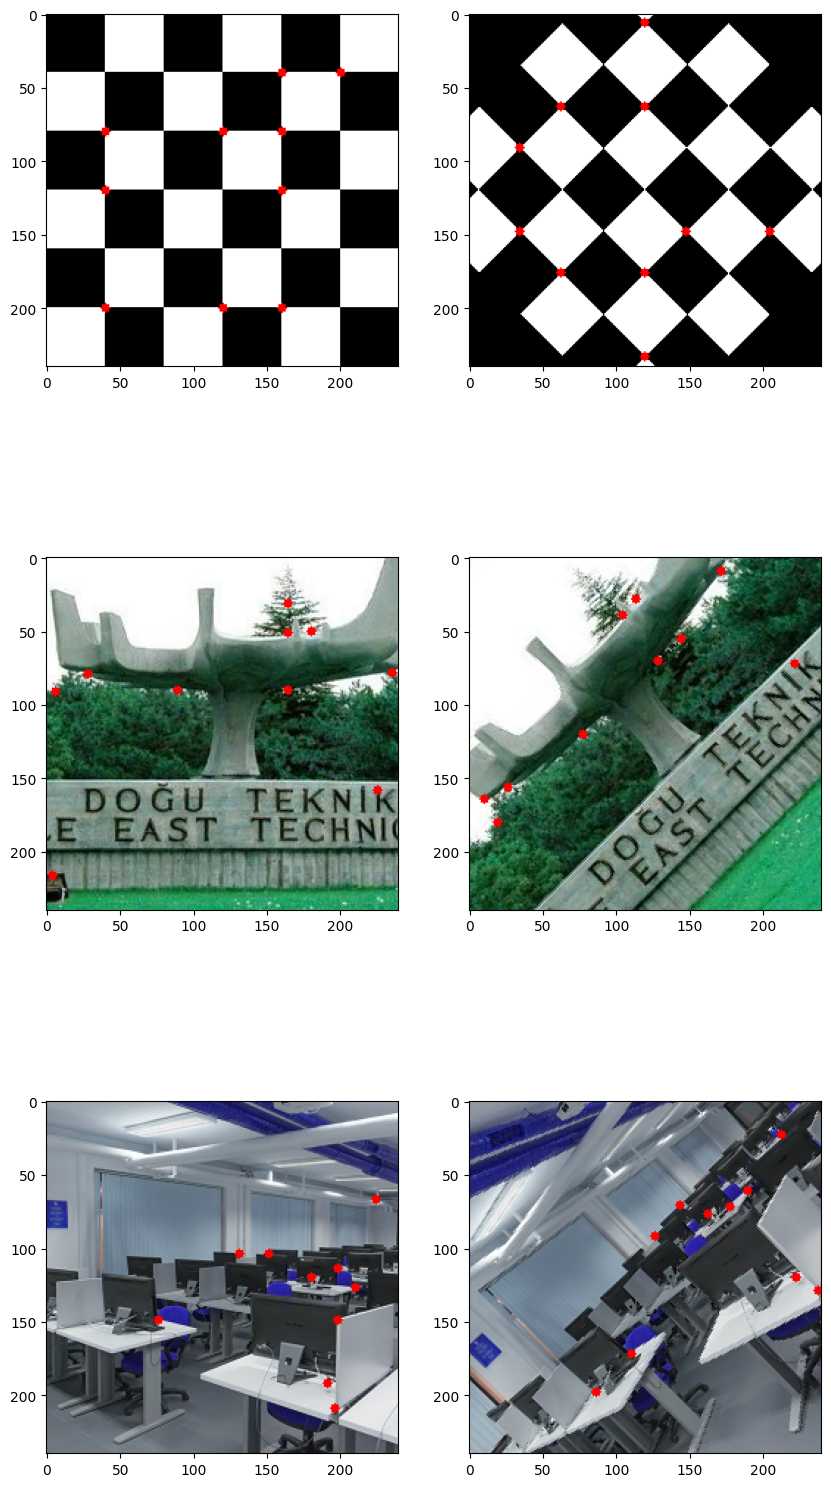

In [34]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(option2(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(option2(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(option2(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(option2(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(option2(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(option2(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [ ]:
## This part is for discussion

"""
    In this task, we performed the second option of fast windowing by applying gaussian weight filter. It has similar behaviour
    with the uniform weight filtering (both operate in same speeds) but the major difference between the uniform weight kernels
    and gaussian kernels is that gaussian kernels produce rotation-invariant results as can be observed above in 'agac' and 'lab'
    images and their rotated versions.
"""